# D212 Assessment 1

# 1. Import Packages and Data

In [1]:
# Used to work with dataframes
import pandas as pd

# Used to work with arrays
import numpy as np

# Used for data visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Used for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Used to build pipeline with steps to scale and fit models
from sklearn.pipeline import make_pipeline

from sklearn.manifold import TSNE

# Model used for analysis
from sklearn.cluster import KMeans

In [2]:
# Read in csv file into pandas dataframe "churn_df"
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# Inspect head of churn data
pd.set_option('display.max_columns',50)
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# 2. Pre-processing

In [4]:
# List variables, null counts, and dtypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### Rename survey columns

In [5]:
# Create dictionary for survey variables that need to be renamed
churn_item_cols = {'Item1': 'Timely_Response',
                         'Item2': 'Timely_Fixes',
                         'Item3': 'Timely_Replacements',
                         'Item4': 'Reliability',
                         'Item5': 'Options',
                         'Item6': 'Respectful_Response',
                         'Item7': 'Courteous_Exchange',
                         'Item8': 'Active_Listening'}

# Rename variables
churn_df.rename(columns=churn_item_cols, inplace=True)

#### Convert categorical (yes/no) fields to binary numeric (1/0)

In [6]:
# Create list of columns to convert
converted_columns = ['Churn', 
                     'Techie', 
                     'Port_modem', 
                     'Tablet', 
                     'Phone', 
                     'Multiple', 
                     'OnlineSecurity', 
                     'OnlineBackup', 
                     'DeviceProtection', 
                     'TechSupport',
                     'StreamingTV', 
                     'StreamingMovies', 
                     'PaperlessBilling']

labelEncoder = LabelEncoder()

# Run for loop iterating through columns to convert, pass dictionary through map function to convert yes/no to 1/0
for i in converted_columns:
    churn_df[i] = labelEncoder.fit_transform(churn_df[i])

#### Convert categorical data to numeric with dummy variables

In [7]:
# Use pandas get dummies for categorical fields "Area", "Marital", "Gender", "Contract"
categorical_conversions = ['Area', 'Marital', 'Contract']
dummy_variables = ['Area_Rural', 'Area_Suburban',
                    'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
                    'Marital_Separated', 'Marital_Widowed',
                    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year']

churn_df = pd.get_dummies(churn_df, columns=categorical_conversions)

In [8]:
# Define numeric features to be used in analysis
features = ['Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 
            'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet',
            'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Tenure',
            'MonthlyCharge', 'Bandwidth_GB_Year', 'Timely_Response', 'Timely_Fixes',
            'Timely_Replacements', 'Reliability', 'Options', 'Respectful_Response',
            'Courteous_Exchange', 'Active_Listening', 'Area_Rural', 'Area_Suburban',
            'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
            'Marital_Separated', 'Marital_Widowed','Contract_Month-to-month', 'Contract_One year', 
            'Contract_Two Year']

In [9]:
# Create dataframe with only numeric variables
churn_numeric = churn_df[features]

# 3. Exploratory Data Analysis

#### Display summary statistics

In [10]:
churn_numeric.describe()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliability,Options,Respectful_Response,Courteous_Exchange,Active_Listening,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_Month-to-month,Contract_One year,Contract_Two Year
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,0.265000,10.001848,12.016000,0.994200,0.398000,0.167900,0.483400,0.299100,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,0.332700,0.334600,0.332700,0.209200,0.191100,0.195600,0.201400,0.202700,0.545600,0.210200,0.244200
std,14432.698671,2.1472,20.698882,28199.916702,0.441355,2.976019,3.025898,0.988466,0.635953,0.373796,0.499749,0.457887,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,0.471204,0.471874,0.471204,0.406758,0.393187,0.396682,0.401066,0.402031,0.497941,0.407471,0.429633
min,0.000000,0.0000,18.000000,348.670000,0.000000,0.099747,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,738.000000,0.0000,35.000000,19224.717500,0.000000,8.018214,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2910.500000,1.0000,53.000000,33170.605000,0.000000,10.018560,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,13168.000000,3.0000,71.000000,53246.170000,1.000000,11.969485,14.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,111850.000000,10.0000,89.000000,258900.700000,1.000000,21.207230,23.000000,7.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualize boxplots of continuous variables to investigate distribution of data and potential outliers

In [11]:
# Create dataframe of numeric non-binary variables
churn_anomaly_detect = churn_df[['Population', 'Children', 'Age', 
                         'Income', 'Outage_sec_perweek', 'Email', 
                         'Contacts', 'Yearly_equip_failure', 'Tenure', 
                         'MonthlyCharge', 'Bandwidth_GB_Year']]

# Standardize data by subtracting each value by its mean and then dividing by the standard deviation
churn_anomaly_detect_standardized = (churn_anomaly_detect - churn_anomaly_detect.mean())/churn_anomaly_detect.std()

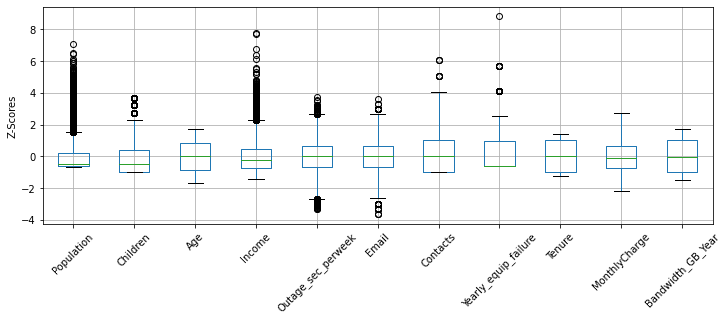

In [12]:
# Enlarge plot to fit all boxplots
fig, ax = plt.subplots(figsize=[12,4])

# Create boxplot of each variable
churn_anomaly_detect_standardized.boxplot()
# Rotate x labels
plt.xticks(rotation=45)
# Title y axis
plt.ylabel('Z-Scores')
plt.show()

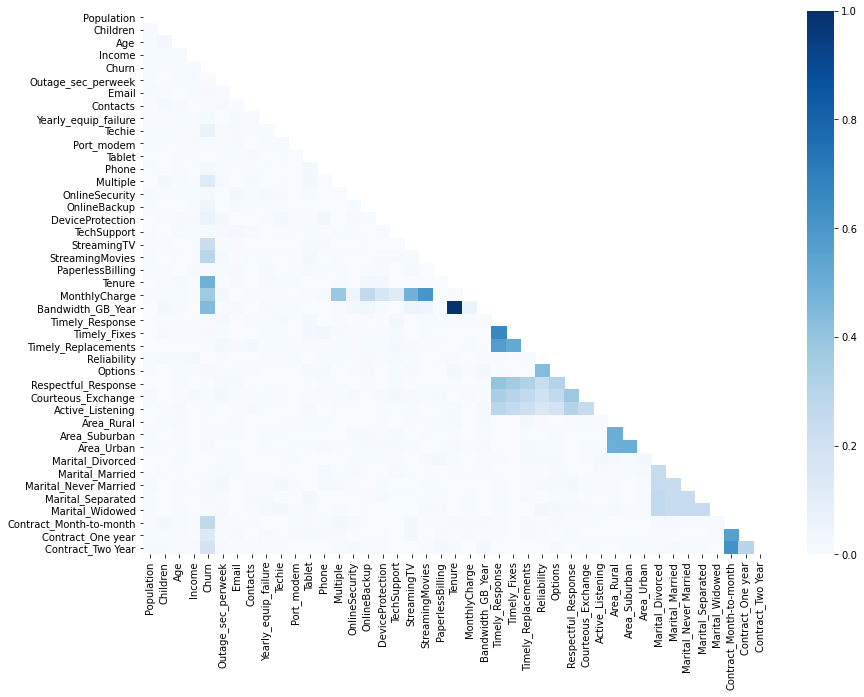

In [13]:
# Use correlation matrix to explore correlation between variables

# churn_numeric.astype(float)
corr_matrix = churn_numeric.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# tri_df = corr_matrix.mask(mask)

fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='Blues', vmin=0, vmax=1, mask=mask)
plt.show()

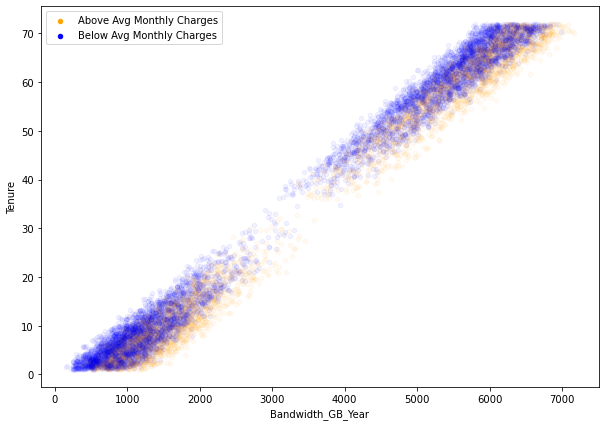

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10,7))

# Create two dataframes for higher and lower than average charges
high_mon_charge = churn_numeric[churn_numeric['MonthlyCharge'] >= np.mean(churn_numeric['MonthlyCharge'])]
low_mon_charge = churn_numeric[churn_numeric['MonthlyCharge'] < np.mean(churn_numeric['MonthlyCharge'])]

# Plot dataframes of higher and lower than average charges
high_mon_charge.plot(kind='scatter', x='Bandwidth_GB_Year', y='Tenure', 
                     color='orange', ax=ax, alpha=0.05, label='Above Avg Monthly Charges')
low_mon_charge.plot(kind='scatter',x='Bandwidth_GB_Year', y='Tenure', 
                    color='blue', ax=ax, alpha=0.05, label='Below Avg Monthly Charges')

# Plot legend
leg = plt.legend()    
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

In [15]:
# Drop Tenure due to multicollinearity
churn_numeric = churn_numeric.drop('Tenure', axis=1)

In [16]:
# Convert r to r squared and store in variable "churn_r_sqr" in descending order
churn_r_sqr = (churn_numeric.corr()**2).sort_values(by='Churn', ascending=False)
# Round r squared scored and print
print(round(churn_r_sqr['Churn'],3))

Churn                      1.000
Bandwidth_GB_Year          0.195
MonthlyCharge              0.139
StreamingMovies            0.084
Contract_Month-to-month    0.072
StreamingTV                0.053
Contract_Two Year          0.032
Contract_One year          0.019
Multiple                   0.017
Techie                     0.004
DeviceProtection           0.003
OnlineBackup               0.003
Phone                      0.001
TechSupport                0.000
Marital_Never Married      0.000
Yearly_equip_failure       0.000
Area_Urban                 0.000
Marital_Separated          0.000
Options                    0.000
OnlineSecurity             0.000
Timely_Fixes               0.000
Email                      0.000
Timely_Replacements        0.000
Marital_Widowed            0.000
Area_Rural                 0.000
Courteous_Exchange         0.000
Contacts                   0.000
Population                 0.000
Port_modem                 0.000
Marital_Married            0.000
Timely_Res

# 4. Feature Selection

#### Define dependent and independent variables and split the training and testing data

In [17]:
# Create arrays for dependent and independent variables
X = churn_numeric.drop(['Churn'], axis=1)
y = churn_numeric['Churn']

# Establish random state seed for reproducability
SEED = 13

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

#### Create scaler, decision tree classifier, and pipeline

In [18]:
# Create scaler
scaler = StandardScaler()

# Create decision tree classifier
rfc = RandomForestClassifier(random_state=SEED, criterion='entropy', max_depth=10)

# Create pipeline with scaler and rfc model
pipeline = make_pipeline(scaler, rfc)

#### Run random forest classification model before reducing variables

In [19]:
# Scale and fit training data to the model using pipeline
pipeline.fit(X_train, y_train)

# Create empty list to add features to
churn_features = []
# Create empty list to add feature importance scores to
churn_feature_scores = []
# Print title
print('Feature Importance Scores')
print('='*50+'\n')
# Iterate through enumerated list
for i, column in enumerate(churn_numeric.drop(['Churn'], axis=1)):
    # Append features and scores to empty lists above for sorting
    churn_features.append(column)
    churn_feature_scores.append(rfc.feature_importances_[i])
    
# Create dataframe with pandas and zip function from churn feature lists
churn_feature_scores_df = pd.DataFrame(zip(churn_features, churn_feature_scores), 
                                       columns=['Feature', 'Feature Importance'])
# Sort and display dataframe in descending order by feature importance score
churn_feature_scores_df.sort_values('Feature Importance', ascending=False)

Feature Importance Scores



,Feature,Feature Importance
21,Bandwidth_GB_Year,0.338014
20,MonthlyCharge,0.136811
18,StreamingMovies,0.071898
38,Contract_Month-to-month,0.070648
17,StreamingTV,0.044184
40,Contract_Two Year,0.030349
3,Income,0.026596
0,Population,0.026191
4,Outage_sec_perweek,0.025233
2,Age,0.022382


Classification Report
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2325
           1       0.70      0.81      0.75       675

    accuracy                           0.88      3000
   macro avg       0.82      0.86      0.84      3000
weighted avg       0.89      0.88      0.88      3000

Confusion Matrix
------------------------------


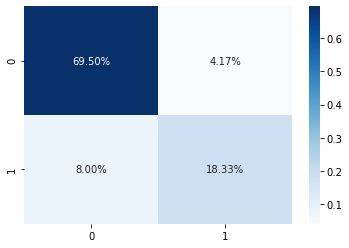

In [20]:
# Calculate predictions to measure accuracy score
y_pred = pipeline.predict(X_test)

# Classification report
print('Classification Report')
print('-'*30)
print(classification_report(y_pred, y_test))
print('='*50)
    
# Confusion matrix
print('Confusion Matrix')
print('-'*30)

# Create prediction matrix
churn_log_matrix = confusion_matrix(y_test, y_pred)
# Create heat map visualization of prediction matrix
sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

In [22]:
# Create recursive feature eliminator with random forest classifier, 3 selected features, 
rfe = RFE(estimator=rfc, n_features_to_select=3, step=3, verbose=1)
# Fit recursive feature eliminator to training data
rfe.fit(X_train, y_train)
# Store remaining features in mask
mask = rfe.support_
# Create reduced variable test and training sets
X_train_reduced = X_train.loc[:, mask]
X_test_reduced = X_test.loc[:, mask]
# Print columns of reduced variables
print(X_train_reduced.columns)

# Fit pipeline to reduced training data
pipeline.fit(X_train_reduced, y_train)
# Calculate accuracy score of reduced model
print('Accuracy score: '+str(accuracy_score(pipeline.predict(X_test_reduced), y_test)))

Fitting estimator with 41 features.
Fitting estimator with 38 features.
Fitting estimator with 35 features.
Fitting estimator with 32 features.
Fitting estimator with 29 features.


KeyboardInterrupt: 

In [ ]:
# Calculate predictions to measure accuracy score
y_pred = pipeline.predict(X_test_reduced)

# Classification report
print('Classification Report')
print('-'*30)
print(classification_report(y_pred, y_test))
print('='*50)
    
# Confusion matrix
print('Confusion Matrix')
print('-'*30)

# Create prediction matrix
churn_log_matrix = confusion_matrix(y_test, y_pred)
# Create heat map visualization of prediction matrix
sns.heatmap(churn_log_matrix/np.sum(churn_log_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.show()

In [ ]:
# Calculate feature importance scores for reduced variables
feature_scores = dict(zip(X_train_reduced, rfc.feature_importances_.round(2)))
# Convert dictionary of feature importance scores into pandas dataframe
feature_scores_df = pd.DataFrame(list(feature_scores.items()),columns = ['Features','Feature_Importance']) 
# Sort reduced features by feature importance scores in descending order
feature_scores_df.sort_values('Feature_Importance', ascending=False)

# KMeans Model

In [ ]:
# Define list of features for analysis
features = ['Churn', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Contract_Month-to-month']
# Create dataframe of reduced features for model
churn_cluster_df = churn_numeric[features]

In [ ]:
# Create range of potential n_clusters values to iterate through
ks = range(1,15)
# Create empty list for inertia scores
inertias = []

for k in ks:
#     # Create scaler
#     scaler = StandardScaler()
    # Create KMeans model, iterating through different values
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    # Create pipline to scale and fit data to KMeans model
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(churn_cluster_df)
    # Append inertia value of iteration to list of inertias
    inertias.append(kmeans.inertia_)

# Plot graph of inertia values at different n_cluster values
plt.plot(ks, inertias)

# Label axis and plot title
plt.xlabel('numer of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# Create KMeans model with 5 clusters
kmeans = KMeans(n_clusters=4, random_state=SEED)

# Create pipeline with scaler, kmeans
pipeline = make_pipeline(scaler, kmeans)

# Fit pipeline to data
pipeline.fit(churn_cluster_df)

# Create KMeans cluster labels
labels = pipeline.predict(churn_cluster_df)

# Create a column in the dataframe named cluster with the labels of the KMeans analysis
pd.options.mode.chained_assignment = None
churn_cluster_df['Cluster'] = labels

# Inspect dataframe with cluster labels
churn_cluster_df.head(n=10)

In [ ]:
# Visualize statistical summary of features in the cluster model
churn_numeric[['Churn', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Contract_Month-to-month']].describe()

In [ ]:
# Print groupby object to visualize the mean values of each cluster
churn_cluster_df.groupby('Cluster')[['Churn', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Contract_Month-to-month']].mean()

In [ ]:
# Create TSNE with learning rate of 200
m = TSNE(learning_rate=200)
# Fit and transform the data
tsne_features = m.fit_transform(churn_cluster_df)
tsne_features[1:4,:]
# Assign TSNE features to new variables X and Y
churn_cluster_df['x'] = tsne_features[:,0]
churn_cluster_df['y'] = tsne_features[:,1]

In [ ]:
# Use seaborn scatterplot to plot X and Y values from TSNE
sns.scatterplot(x='x', y='y', hue='Churn', data=churn_cluster_df, alpha=0.2, edgecolor='black')
plt.show()

In [ ]:
# Print inertia value to determine the accuracy of the model
print('Inertia value of Kmeans cluster model: '+ str(round(kmeans.inertia_,2)))

In [ ]:
# Export cleaned dataset
churn_numeric.to_csv('churn_cleaned_task_submission.csv', index=False)

In [ ]:
# KMeans is notoriously dependant on the centroid initialization.

# References

#### Scatterplots

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

https://matplotlib.org/stable/tutorials/text/annotations.html

#### KMeans

https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://imaddabbura.github.io/post/kmeans-clustering/#evaluation
